In [4]:
# Run some setup code for this notebook.

import random
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from __future__ import print_function

import cv2

import scipy
from scipy import ndimage

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# File Names
layer_name = 'VIIRS_SNPP_CorrectedReflectance_TrueColor'
missing_data_name = 'VIIRS_SNPP_CorrectedReflectance_Missing_Data_Certain'
miscoloration_name = 'VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain'

# Directory Settings
img_extension = ".jpg"
data_dir = 'data/4326/'
labels_file = os.path.join(data_dir, layer_name + ".txt")
img_size = (2048, 1024)

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_val, y_val
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

def parse_labels(label_arr):
    """    
    None = Normal
    1 = missing data (expected)
    2 = missing data (unexpected)
    3 = miscoloration
    4 = edge warping
    5 = eclipse (missing data)
    6 = eclipse (only miscoloration)
    """
    label = 0
    
    # Normal image!
    if len(label_arr) == 0:
        return label # normal
    
    # NON-ECLIPSE
    if 1 in label_arr or 2 in label_arr:
        label = 1 # missing data
    
    if 3 in label_arr:
        label = 2 # miscoloration

    return label

def get_data(root_path, labels_file, split = ""):
    # Validate the file directory
    assert os.path.exists(labels_file), "Cannot find the {} file".format(layer_name + ".txt")
    
    # Build up the filenames and labels
    train_images = []
    val_images = []
    test_images = []
    
    train_labels = []
    val_labels = []
    test_labels = []
    
    # Read in the file line by line
    img_counter = 0
    with open(labels_file) as f:
        file_lines = f.read().splitlines()
        num_total_img = len(file_lines)
        for line in file_lines:
            line_list = line.split()  
            split = line_list[0]
            datestring = line_list[1]
            label_arr = [int(item) for item in line_list[2:]]
            img_label = parse_labels(label_arr)
            
            # Skip normal images!
            if img_label == 0:
                continue
            
            # Construct the image
            filename = os.path.join(root_path, datestring, layer_name + img_extension)
            image = np.asarray(Image.open(filename).resize(img_size, Image.NEAREST))
            
            print(datestring)
            
            # Missing data label
            missing_data_label = np.zeros((image.shape[0], image.shape[1]))
            if 1 in label_arr or 2 in label_arr:
                # print("Missing Data Found!")
                missing_data_filename = os.path.join(root_path, datestring, missing_data_name + '.png')
                missing_data_label = np.asarray(Image.open(missing_data_filename).resize(img_size, Image.NEAREST))
            missing_data_label = missing_data_label.astype(int) / 255

            # Miscoloration label
            miscoloration_label = np.zeros((image.shape[0], image.shape[1]))
            if 3 in label_arr:
                # print("Miscoloration Found!")
                miscoloration_filename = os.path.join(root_path, datestring, miscoloration_name + '.png')            
                miscoloration_label = np.asarray(Image.open(miscoloration_filename).resize(img_size, Image.NEAREST))
            miscoloration_label = miscoloration_label.astype(int) / 255
            
            # print(np.argwhere(miscoloration_label == 1))
            
            # Final pixel label
            pixel_label = missing_data_label + (2 * miscoloration_label)
            
            if split == 'train':
                train_images.append(image)
                train_labels.append(pixel_label)
            elif split == 'val':
                val_images.append(image)
                val_labels.append(pixel_label)
            else:
                test_images.append(image)
                test_labels.append(pixel_label)
            
            img_counter += 1
            if img_counter % 100 == 0:
                print('Loaded {} / {} images'.format(img_counter, num_total_img))
    
    X_train = np.array(train_images)
    y_train = np.array(train_labels)

    X_val = np.array(val_images)
    y_val = np.array(val_labels)
    
    X_test = np.array(test_images)
    y_test = np.array(test_labels)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_data(data_dir, labels_file)

# Save for later analysis
orig_X_train = X_train
orig_X_val = X_val
orig_X_test = X_test

# # As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

2015-11-25
2015-12-11
2015-12-21
2015-12-23
2016-01-09
2016-01-11
2016-01-14
2016-01-18
2016-01-19
2016-01-30
2016-02-06
2016-02-18
2016-03-18
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09
2016-04-10
2016-04-11
2016-04-12
2016-04-13
2016-04-14
2016-04-15
2016-04-16
2016-04-17
2016-04-18
2016-04-19
2016-04-20
2016-04-21
2016-04-22
2016-04-23
2016-04-24
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-04-30
2016-05-01
2016-05-02
2016-05-03
2016-05-04
2016-05-05
2016-05-06
2016-05-07
2016-05-08
2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-14
2016-05-15
2016-05-16
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-21
2016-05-22
2016-06-15
2016-07-13
2016-08-13
2016-08-18
2016-10-19
2016-11-09
2016-11-10
2016-11-29
2016-12-10
2016-12-14
2016-12-20
2016-12-29
2017-01-08
2017-01-28
2017-02-06
2017-03-08
2017-03-15
2017-03-19
2017-03-26
2017-03-29
2017-03-30
2017-03-31
2017-04-01
2017-04-05
2017-04-06

## Extract Features
For each image we will compute a *Histogram of Oriented Gradients (HOG)* as well as a *color histogram* using the hue channel in HSV color space. We form our final feature vector for each image by concatenating the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring color information, and the color histogram represents the color of the input image while ignoring texture. As a result, we expect that using both together ought to work better than using either alone.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single image and return a feature vector for that image. The `extract_features` function takes a set of images and a list of feature functions and evaluates each feature function on each image, storing the results in a matrix where each column is the concatenation of all feature vectors for a single image.

In [88]:
from features import *
from skimage.feature import hog 

# Search for abnormal black pixels!
# abnormal_train_idx = np.argwhere(y_train>=1)
# n_abnormal_train = abnormal_train_idx.shape[0]
# print(abnormal_train_idx.shape) # (im_idx, im_h, im_w)
# print(X_train[0, :, :, :].shape)
# img_idx, pixel_y, pixel_x = abnormal_train_idx[i]

def construct_image_patches(X, patch_size=(10, 10), verbose=True):
    # Build up all patches in training set
    num_images = X.shape[0]
    h, w, n_channel = X.shape[1], X.shape[2], X.shape[3]
    num_patches = num_images * h * w

    X_patches = np.zeros((num_patches, patch_size[0], patch_size[1], n_channel))
    patch_idx = 0
    for img_idx in range(num_images):
        # Get the image patch
        img = X[img_idx, :, :, :] # h, w, rgb    
        for pixel_x in range(w):
            for pixel_y in range(h):
                pixel_xy = (pixel_x, pixel_y)
                X_patches[patch_idx,:,:,:] = get_img_patch(img, pixel_xy, patch_size)
        if verbose:
            print('Done with image patches for %d / %d images' % (img_idx + 1, num_images))
    return X_patches

X_train_patches = construct_image_patches(X_train)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


Done with image patches for 1 / 76 images
Done with image patches for 2 / 76 images
Done with image patches for 3 / 76 images
Done with image patches for 4 / 76 images
Done with image patches for 5 / 76 images
Done with image patches for 6 / 76 images
Done with image patches for 7 / 76 images
Done with image patches for 8 / 76 images
Done with image patches for 9 / 76 images
Done with image patches for 10 / 76 images
Done with image patches for 11 / 76 images
Done with image patches for 12 / 76 images
Done with image patches for 13 / 76 images
Done with image patches for 14 / 76 images
Done with image patches for 15 / 76 images
Done with image patches for 16 / 76 images
Done with image patches for 17 / 76 images
Done with image patches for 18 / 76 images
Done with image patches for 19 / 76 images
Done with image patches for 20 / 76 images
Done with image patches for 21 / 76 images
Done with image patches for 22 / 76 images
Done with image patches for 23 / 76 images
Done with image patc

In [ ]:
num_color_bins = 10 # Number of bins in the hue color histogram
feature_fns = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)] #, hog_feature]

X_train_feats = extract_features(X_train_patches, feature_fns, verbose=True)
# X_val_feats = extract_features(X_val, feature_fns)
# X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
# X_val_feats -= mean_feat
# X_test_feats -= mean_feat

# # Preprocessing: Divide by standard deviation. This ensures that each feature
# # has roughly the same scale.
# std_feat = np.std(X_train_feats, axis=0, keepdims=True)
# X_train_feats /= std_feat
# X_val_feats /= std_feat
# X_test_feats /= std_feat

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train.reshape(-1, 3), y_train.reshape(-1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
# print(clf.feature_importances_)

y_val_pred = clf.predict(np.reshape(X_val, (-1, 3)))
y_val_prob = clf.predict_proba(np.reshape(X_val, (-1, 3)))[:, 1]

print(y_val_pred.shape)
print(np.argwhere(y_val_pred == 0).shape)

# import cPickle

# with open('experiments/random_forests', 'wb') as f:
#     cPickle.dump(clf, f)

# # in your prediction file                                                                                                                                                                                                           

(48234496,)
(48134920, 1)


In [ ]:
def confusion_matrix(results, categories, normalizeMatrix = True, plotConfusion=False):
    """ Generate confusion matrix
    - results = list of tuples of (correct label, predicted label)
    - categories = list of category names
    Returns confusion matrix; rows are correct labels and columns are predictions
    """
    # Empty confusion matrix
    matrix = np.zeros((len(categories),len(categories)))

    # Iterate over all labels and populate matrix
    for label, pred in results:
        matrix[label, pred] += 1

    # Print matrix and percent accuracy
    accuracy = float(np.trace(matrix)) * 100.0 / len(results)
    print('Accuracy: ' +  str(accuracy) + '%')

    # Normalize confusion matrix
    if normalizeMatrix:
      print("Non-normalized conf_matrix:")
      print(matrix)
      s = np.sum(matrix,1) # Sum each row
      for i in range(matrix.shape[0]):
        # Normalization handles class imbalance in training set
        matrix[i,:] /= s[i]

    # Save matrix to file:
    # np.save("confusion_matrix.npy",matrix)

    # Plot the confusion matrix
    if plotConfusion:
        plot_confusion_matrix(matrix, categories)

def plot_confusion_matrix(cm, names=None, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(4)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Add labels to confusion matrix:
    if names is None:
        names = range(cm.shape[0])

    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)

    plt.tight_layout()
    plt.ylabel('Correct label')
    plt.xlabel('Predicted label')
    plt.show()

classes = ['normal', 'missing data', 'miscoloration']
confusion_matrix(list(zip(y_test, y_test_pred)), classes, plotConfusion=True)

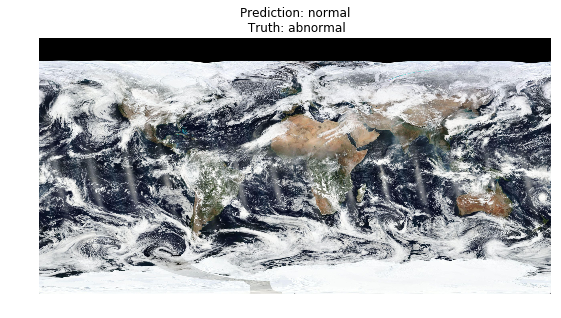

In [10]:
# Visualize misclassified examples from the validation dataset.
num_classes = len(classes)
max_examples = 5

incorrect_idx = [idx for idx, incorrect in enumerate(y_test != y_test_pred) if incorrect]
if len(incorrect_idx) > max_examples:
    incorrect_idx = incorrect_idx[:max_examples]
num_incorrect = len(incorrect_idx)

for y, idx in enumerate(incorrect_idx):
    for i in range(3):
        plt_idx = i * num_incorrect + y + 1
        if i == 0:
            plt.subplot(3, num_incorrect, plt_idx)
            plt.imshow(X_test[idx].astype('uint8'))
            plt.axis('off')
            plt.title("Prediction: %s\n Truth: %s" % (classes[y_test_pred[idx]], classes[y_test[idx]]))
        # elif i == 1:
            # plt.subplot(3, num_incorrect, plt_idx)
            # probabilities = y_val_prob[idx]
            # y_pos = np.arange(len(classes))
            # plt.bar(y_pos, probabilities)
            # plt.xticks(y_pos, classes, rotation=45)
            # plt.ylabel("Probability")
plt.show()

In [10]:
# Fetch metrics
def accuracy(outputs, labels):
    """
    Compute the accuracy, given the outputs and labels for all images.

    Args:
        outputs: (np.ndarray) dimension batch_size x 2 - log softmax output of the model
        labels: (np.ndarray) dimension batch_size, where each element is a value in [0, 1]

    Returns: (float) accuracy in [0,1]
    """
    outputs = np.argmax(outputs, axis=1)
    return np.sum(outputs==labels)/float(labels.size)

def recall(outputs, labels):
    """
    Compute the recall, given the outputs and labels for all images.

    Args:
        outputs: (np.ndarray) dimension batch_size x 2 - log softmax output of the model
        labels: (np.ndarray) dimension batch_size, where each element is a value in [0, 1]

    Returns: (float) recall in [0,1]
    """
    outputs = np.argmax(outputs, axis=1)
    return recall_score(labels, outputs)

def precision(outputs, labels):
    """
    Compute the precision, given the outputs and labels for all images. 
    
    The precision is the ratio tp / (tp + fp) where tp is the number 
    of true positives and fp the number of false positives. 
    
    The precision is intuitively the ability of the classifier not to 
    label as positive a sample that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Args:
        outputs: (np.ndarray) dimension batch_size x 2 - log softmax output of the model
        labels: (np.ndarray) dimension batch_size, where each element is a value in [0, 1]

    Returns: (float) precision in [0,1]
    """
    outputs = np.argmax(outputs, axis=1)
    return precision_score(labels, outputs)

def f1_metric(outputs, labels):
    """
    Compute the F1 score, given the outputs and labels for all images.

    Args:
        outputs: (np.ndarray) dimension batch_size x 2 - log softmax output of the model
        labels: (np.ndarray) dimension batch_size, where each element is a value in [0, 1]

    Returns: (float) F1 score in [0,1]
    """
    outputs = np.argmax(outputs, axis=1)
    return f1_score(labels, outputs)

def roc_graph(outputs, labels):
    """
    Compute Receiver operating characteristic (ROC).
    
    Args:
        outputs: (np.ndarray) dimension batch_size x 2 - log softmax output of the model
        labels: (np.ndarray) dimension batch_size, where each element is a value in [0, 1]
        
    Returns: fpr, tpr, thresholds
    """
    outputs = outputs[:,1]
    return roc_curve(labels, outputs)

def roc_auc_metric(outputs, labels):
    """
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    """
    outputs = outputs[:,1]
    return roc_auc_score(labels, outputs)

# maintain all metrics required in this dictionary- these are used in the training and evaluation loops
metrics = {
    'AUC': roc_auc_metric, # area under receiver operator characteristic curve
    'F1': f1_metric, # weighted average of precision and recall
    'recall': recall, 
    'precision': precision,
    'accuracy': accuracy,
    # could add more metrics such as accuracy for each token type
}

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_prob)
# test_fpr, test_tpr, test_thresholds = roc_graph(y_test_prob, y_test)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
# roc_auc_metric(y_test_prob, y_test)
print('ROC curve (area = %0.3f)' % test_roc_auc)
# test_roc_auc = test_metrics['AUC']

plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.show()